# DVT Tests 

* Epicurious recipes 
* whats cooking - yummy 

## My notes 
** nltk (Natural Language Toolkit<br>**
Word lemmatization - http://www.nltk.org/index.html
 
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.
 

In [2]:
# from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter

In [1]:
%matplotlib inline

# input_dir = './'
input_dir = '../../_data_tmp/food/'

# EPI
https://www.epicurious.com/recipes-menus

In [8]:
dst = pd.read_csv(input_dir + 'epi_r.csv')

In [23]:
print(len(dst))
dst.head(1)

20052


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [45]:
# remove recipes with more than 10,000cal and remove missing values
dstc = dst.loc[dst["calories"]<10000]
dstc = dstc.dropna(axis=0, how='all', thresh=1)
dstc = dstc.fillna(0)
print(len(dstc))
dstc.describe()

15901


,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,...,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,3.753538,488.299541,21.219986,27.717628,700.555185,0.000377,0.000063,0.000943,0.001258,0.000440,...,0.001258,0.022389,0.000063,0.000314,0.014150,0.000126,0.000314,0.001321,0.000818,0.021194
std,1.294581,602.123337,42.529669,42.298548,2972.514564,0.019422,0.007930,0.030700,0.035444,0.020978,...,0.035444,0.147948,0.007930,0.017730,0.118113,0.011215,0.017730,0.036318,0.028582,0.144034
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,198.000000,3.000000,7.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,331.000000,8.000000,17.000000,294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,586.000000,27.000000,33.000000,707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,9831.000000,1625.000000,923.000000,132220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## NRD

Analyse nutritional and quick info

In [5]:
# import seaborn as sns
# plt.style.use('fivethirtyeight')

In [11]:
recipes = dst.iloc[:,:10]
recipes.drop(['#cakeweek','#wasteless'], axis=1, inplace=True)
recipes.describe()

,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes
count,18216.000000,1.592200e+04,15039.000000,1.464600e+04,1.587200e+04,17.0,27.0
mean,4.088850,6.328121e+03,105.828513,3.758432e+02,6.249903e+03,1.0,1.0
std,0.669443,3.591926e+05,3947.409033,2.129287e+04,3.339579e+05,0.0,0.0
min,1.250000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.0,1.0
25%,3.750000,1.980000e+02,4.000000,1.000000e+01,8.175000e+01,1.0,1.0
50%,4.375000,3.310000e+02,9.000000,1.900000e+01,2.960000e+02,1.0,1.0
75%,4.375000,5.867500e+02,29.000000,3.500000e+01,7.130000e+02,1.0,1.0
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.0,1.0


* a lot of ratings with 4.375 -> this can be an issue 
* pull outliers from calories (and rest)
* fill missing values 

In [12]:
#checking nan values in each column
for i in recipes.columns:
    print(i, sum(recipes[i].isnull()))

title 0
rating 1836
calories 4130
protein 5013
fat 5406
sodium 4180
22-minute meals 20035
3-ingredient recipes 20025


In [13]:
#filling nan values with pseudo-average & removing outliers ---- may not be best method, alternative is to drop nan rows
cal_clean = recipes.loc[recipes['calories'].notnull()]
q1  = cal_clean['calories'].quantile(.25)
q3  = cal_clean['calories'].quantile(.75)
iqr = q3 - q1

for i in recipes.columns[1:6]:
    recipes[i].fillna(cal_clean.loc[(cal_clean['calories'] > q1) & (recipes['calories'] < q3)][i].mean(), inplace=True)
    
recipes = recipes.loc[(recipes['calories'] > q1-(iqr*3)) & (recipes['calories'] < q3+(iqr*3))]
#check summary stats after cleaning data
recipes.describe()

,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes
count,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,16.0,27.0
mean,4.087356,402.848464,17.505984,23.505631,605.310695,1.0,1.0
std,0.639391,282.409776,21.433510,19.450967,2443.505598,0.0,0.0
min,1.250000,1.000000,1.000000,1.000000,1.000000,1.0,1.0
25%,3.750000,227.000000,5.000000,13.000000,121.000000,1.0,1.0
50%,4.375000,353.912852,13.604099,19.342109,453.000000,1.0,1.0
75%,4.375000,481.000000,17.000000,26.000000,528.000000,1.0,1.0
max,5.000000,1750.000000,253.000000,166.000000,132220.000000,1.0,1.0


In [15]:
#plotting health metrics against recipe rating - seaborn as sns! 

# dict_plt = {0:'calories',1:'protein',2:'fat',3:'sodium'}
# sns.set(font_scale=.7)
# fig, ax = plt.subplots(1,4, figsize=(10,3))
# for i in range(4):
#     sns.barplot(x='rating',y=dict_plt[i], data=recipes, ax=ax[i], errwidth=1)
#     ax[i].set_title('rating by {}'.format(dict_plt[i]), size=15)
#     ax[i].set_ylabel('')

get 5 stars ratings with low calories

In [16]:
five_star = recipes.loc[recipes['rating'] == 5]
print('We have {:,} 5-star recipes to choose from'.format(len(recipes.loc[recipes['rating'] == 5])))

We have 2,652 5-star recipes to choose from


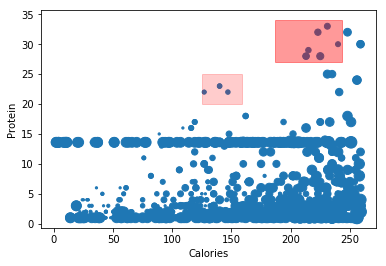

In [17]:
a = pd.qcut(five_star['calories'], [0,.33,.66,1], labels=['low cal','med cal', 'high cal']).rename('cal_bin')
five_star = five_star.join(a)
low_cal = five_star.loc[five_star['cal_bin'] == 'low cal']
plt.scatter(x='calories', y='protein', s=low_cal['fat']*5, data=low_cal)
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.axhspan(ymin=20, ymax=25, xmin=.48, xmax=.6, alpha=.2, color='r')
plt.axhspan(ymin=27, ymax=34, xmin=.7, xmax=.9, alpha=.4, color='r')

In [18]:
#light red box from chart above
low_cal.loc[(low_cal['protein'] > 20) & (low_cal['calories'] < 160)]

,title,rating,calories,protein,fat,sodium,22-minute meals,3-ingredient recipes,cal_bin
6056,Giblet Stock,5.0,127.0,22.0,3.0,95.0,NaN,NaN,low cal
7850,Turkey Stock,5.0,140.0,23.0,4.0,103.0,NaN,NaN,low cal
13422,Giblet Stock,5.0,127.0,22.0,3.0,95.0,NaN,NaN,low cal
14199,Turkey Stock,5.0,140.0,23.0,4.0,103.0,NaN,NaN,low cal
14518,"Salted Roast Turkey with Orange, Fall Spices, ...",5.0,147.0,22.0,4.0,763.0,NaN,NaN,low cal


In [20]:
#dark red box from chart above
# low_cal.loc[low_cal['protein'] > 27]

## DL EP

True


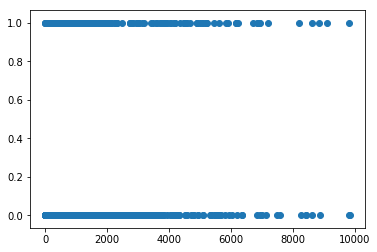

In [52]:
# Can I predict whether or not a recipe is a dessert based on how many calories it has?
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
print( is_numeric_dtype(dstc["rating"]) )
# R - are the ratings all integers?
# print("Is this variable only integers?")
# all.equal(recpies$rating, as.integer(recpies$rating)) == T
plt.close()
plt.scatter(dstc["calories"],dstc["dessert"])
# dstc["calories"]

## OTH

# YUMMY
* Whatscookingscript - cousines
* 10 most common ingr - counter

In [4]:
traindf = pd.read_json(input_dir + "train.json")
testdf = pd.read_json( input_dir + "./test.json") 

In [5]:
traindf.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


## whatscookingscript.py

GridSearchCV + LogisticRegression scikit-learn

classify recipes into their cousines (20): 
* brazilian
* british
* cajun_creole
* chinese
* filipino
* french
* greek
* indian
* irish
* italian
* jamaican
* japanese
* korean
* mexican
* moroccan
* russian
* southern_us
* spanish
* thai
* vietnamese


In [44]:
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression

# import scikit-learn => wrong syntax

# extra
from sklearn import cross_validation
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [12]:
traindf['ingredients_clean_string'] = [' , '.join(z).strip() for z in traindf['ingredients']]  

In [13]:
# nltk.download('wordnet') # neccesart to use WordNetLemmatizer

In [14]:
# -> I need to install nltk
traindf['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) 
                                           for line in lists]).strip() for lists in traindf['ingredients']]    
# traindf['ingredients_string'] = [' '.join(z).strip() for z in traindf['ingredients']]  

In [15]:
#test dataset

testdf['ingredients_clean_string'] = [' , '.join(z).strip() for z in testdf['ingredients']]
testdf['ingredients_string'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) 
                                       for line in lists]).strip() for lists in testdf['ingredients']]    


In [16]:
# Vectorize train
corpustr = traindf['ingredients_string']
vectorizertr = TfidfVectorizer(stop_words='english',
                             ngram_range = ( 1 , 1 ),analyzer="word", 
                             max_df = .57 , binary=False , token_pattern=r'\w+' , sublinear_tf=False)
tfidftr=vectorizertr.fit_transform(corpustr).todense()
# Vectorize test
corpusts = testdf['ingredients_string']
vectorizerts = TfidfVectorizer(stop_words='english')
tfidfts=vectorizertr.transform(corpusts)

c:\users\a604080\appdata\local\programs\python\python35\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [27]:
tfidftr

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
predictors_tr = tfidftr
targets_tr = traindf['cuisine']
predictors_ts = tfidfts

In [24]:
predictors_tr

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# clf2 = LinearSVC(random_state=1, C=0.4, penalty="l2", dual=False)
#classifier = LinearSVC(C=0.80, penalty="l2", dual=False)
parameters = {'C':[1, 10]}
#clf = LinearSVC()
clf = LogisticRegression()
# clf1 = LogisticRegression(random_state=1, C=7)
# nb = BernoulliNB()
# rfc = RandomForestClassifier(random_state=1, criterion = 'gini', n_estimators=200)
# sgd = SGDClassifier(random_state=1, alpha=0.00001, penalty='l2', n_iter=80)

classifier = grid_search.GridSearchCV(clf, parameters)
classifier=classifier.fit(predictors_tr,targets_tr)
scores = cross_validation.cross_val_score(clf, predictors_tr,targets_tr, cv=2, scoring='accuracy')
print("training scores:  " + str(scores) )
print("Accuracy: %0.4f (+/- %0.5f) [%s]" % (scores.mean(), scores.std(), "Logistic Regression"))


predictions=classifier.predict(predictors_ts)

training scores:  [0.76509325 0.76329158]
Accuracy: 0.7642 (+/- 0.00090) [Logistic Regression]


In [ ]:
# EnsembleClassifier
# eclf = EnsembleClassifier(clfs=[clf1, clf2,nb, rfc, sgd], weights=[3, 3, 1, 2, 2])


In [28]:
testdf['cuisine'] = predictions
# testdf = testdf.sort('id' , ascending=True)
# sort was deprecated for DataFrames in favor of needing to user either sort_values or sort_index. 
testdf = testdf.sort_values(by=['id'],ascending=True)

testdf[['id' , 'ingredients_clean_string' , 'cuisine' ]].to_csv("test_cuisine.csv")

In [38]:
len(predictions)

9944

## 10 most used ingredients... 

counter... 

Plot with the 10 most used ingredients.
The original recipe, contained in the 'ingredients' column, is cleaned as follow:
- to lowecase
- replacing symbols
- removing digits
- stemming the words using the WordNetLemmatizer

next: make 'low fat mozzarella' and 'reduced fat mozzarella' => same ingredient. 

In [31]:
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
#cachedStopWords = stopwords.words("english")

# Auxiliar function for cleaning
def clean_recipe(recipe):
    # To lowercase
    recipe = [ str.lower(i) for i in recipe ]

    # Remove some special characters
    # Individuals replace have a very good performance
    # http://stackoverflow.com/a/27086669/670873
    def replacing(i):
        i = i.replace('&', '').replace('(', '').replace(')','')
        i = i.replace('\'', '').replace('\\', '').replace(',','')
        i = i.replace('.', '').replace('%', '').replace('/','')
        i = i.replace('"', '')
        return i
    
    # Replacing characters
    recipe = [ replacing(i) for i in recipe ]
    # Remove digits
    recipe = [ i for i in recipe if not i.isdigit() ]
    # Stem ingredients
    recipe = [ stemmer.lemmatize(i) for i in recipe ]
    return recipe

# The number of times each ingredient is used is stored in the 'sumbags' dictionary
bags_of_words = [ Counter(clean_recipe(recipe)) for recipe in traindf.ingredients ]
sumbags = sum(bags_of_words, Counter())


In [40]:
print(type(sumbags))
print(sumbags.most_common(10))
# dst = pd.DataFrame(sumbags, index=[0]).transpose()[0].sort(ascending=False, inplace=False)[:10]
dst = pd.DataFrame(sumbags, index=[0]).transpose()[0].sort_values(ascending=False, inplace=False)[:10]
# dst = pd.DataFrame(sumbags, index=[0]).transpose()[0].sort_index(ascending=False, inplace=False)[:10]



<class 'collections.Counter'>
[('salt', 18049), ('olive oil', 7972), ('onion', 7972), ('water', 7457), ('garlic', 7380), ('sugar', 6434), ('garlic cloves', 6237), ('butter', 4848), ('ground black pepper', 4785), ('all-purpose flour', 4632)]


In [41]:
dst

salt                   18049
onion                   7972
olive oil               7972
water                   7457
garlic                  7380
sugar                   6434
garlic cloves           6237
butter                  4848
ground black pepper     4785
all-purpose flour       4632
Name: 0, dtype: int64

In [42]:
# Finally, plot the 10 most used ingredients
plt.style.use(u'ggplot')
fig = dst.plot(kind='barh')
fig.invert_yaxis()
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('10_most_used_ingredients.jpg')

## DL Cooking.


In [50]:
import os
import json
# import cPickle as pickle

import numpy as np
import pandas as pd

from collections import OrderedDict

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

from itertools import chain

# import theano
# import theano.tensor as T
# import lasagne as nn

In [96]:
###########################################################
# auxiliary functions for nn

def get_param_values(params):
    return [p.get_value() for p in params]

def set_param_values(params, param_values):
    for p, pv in zip(params, param_values):
        p.set_value(pv)
        
def normalize_input(X):
    return (X.T / np.sum(X, axis=1)).T

def encode_label(l):
    v = np.zeros(label_names.size)
    print(v)
    i = lbl.transform([l])
    v[i] = 1.0
    return v

In [86]:
###########################################################
# load and preprocess data

input_dir = './'

# train
with open(os.path.join(input_dir, 'train.json')) as train_f:
    train_data = json.loads(train_f.read())

X_train = [x['ingredients'] for x in train_data]
X_train = [dict(zip(x,np.ones(len(x)))) for x in X_train]

vec = DictVectorizer()
X_train = vec.fit_transform(X_train).toarray()
X_train = normalize_input(X_train)

feature_names = np.array(vec.feature_names_)

lbl = LabelEncoder()

y_train = [y['cuisine'] for y in train_data]
y_train = lbl.fit_transform(y_train).astype(np.int32)

label_names = lbl.classes_ 

In [73]:
print("output")
print(y_train)
print("input")
print(X_train)
print(len(feature_names))
print(len(X_train))
print(label_names)

output
[ 6 16  4 ...  8  3 13]
input
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
6714
39774
['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']


In [98]:
vec_in = encode_label('chinese')
vec_in

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [100]:
###########################################################
# construct nn classifier
LEARNING_RATE = 0.01
OUTPUT_DIM = label_names.size # = 20

BATCH_SIZE = 1 #256 - to create network || 1 for testing
NUM_EPOCHS = 1 #100 - to create network || 1 for testing

# pad samples
n_train = X_train.shape[0]


### Theano

In [84]:
def sgd(loss, all_parameters, learning_rate):
    all_grads = [theano.grad(loss, param) for param in all_parameters]
    updates = []

    for param_i, grad_i in zip(all_parameters, all_grads):
        v = - learning_rate * grad_i

        # clip from 0.0 to 1.0
        updates.append((param_i, T.clip(param_i + v, 0.0, 1.0)))
    return updates

def theano_nn():
    # theano based neural network
    # (2) i/o 
    X_shared = theano.shared(np.zeros((1, 1,), dtype=theano.config.floatX))
    y_shared = theano.shared(np.zeros((1, 1,), dtype=theano.config.floatX))
    #y_shared = theano.shared(np.zeros((1,), dtype=theano.config.floatX))
    #y_shared_casted = T.cast(y_shared, 'int32')

    batch_index = T.lscalar('batch_index')
    activation = nn.nonlinearities.rectify

    l_in = nn.layers.InputLayer(input_var=X_shared, shape=(BATCH_SIZE, X_train.shape[1]),)
    l_hidden0_dropout = nn.layers.DropoutLayer(l_in, p=0.0)

    l_hidden1 = nn.layers.DenseLayer( l_hidden0_dropout, num_units=1024,
        nonlinearity=activation, W=nn.init.GlorotUniform(),)
    l_hidden1_dropout = nn.layers.DropoutLayer(l_hidden1, p=0.5)

    l_hidden2 = nn.layers.DenseLayer( l_hidden1_dropout, num_units=1024,
        nonlinearity=activation, W=nn.init.GlorotUniform(),)
    l_hidden2_dropout = nn.layers.DropoutLayer(l_hidden2, p=0.5)

    # classifier
    l_out = nn.layers.DenseLayer( l_hidden2_dropout, num_units=OUTPUT_DIM,
        nonlinearity=nn.nonlinearities.softmax, W=nn.init.GlorotUniform(),) 

    # (3) loss, outputs, updates
    learning_rate = theano.shared(np.array(LEARNING_RATE, dtype=theano.config.floatX))
    all_params = nn.layers.get_all_params(l_out)

    # load weights
    nn_params = pickle.load(open('nn_params.pkl'))
    set_param_values(all_params, nn_params)

    #loss_train = T.mean(-T.log( nn.layers.get_output(l_out) )[T.arange(y_shared_casted.shape[0]), y_shared_casted])
    #loss_eval = T.mean(-T.log( nn.layers.get_output(l_out, deterministic=True) )[T.arange(y_shared_casted.shape[0]), y_shared_casted])
    #loss_train = T.mean( ( nn.layers.get_output(l_out) - y_shared) ** 2.0 )

    loss_train = T.mean( ( nn.layers.get_output(l_out) - y_shared) ** 2.0 ) \
        + 0.0001 * T.mean(T.sum(abs(X_shared), axis=1)) 

    pred = T.argmax( nn.layers.get_output(l_out, deterministic=True), axis=1)
    pred_proba = nn.layers.get_output(l_out, deterministic=True)

    #updates = nn.updates.nesterov_momentum( loss_train, all_params, learning_rate,)
    #updates = nn.updates.sgd( loss_train, [X_shared], learning_rate,)
    updates = sgd( loss_train, [X_shared], learning_rate,) # sgd with clip

    train = theano.function([], [loss_train], updates=updates,)

#### training

In [ ]:
# train
print('start training')
for e in xrange(NUM_EPOCHS):

    # shuffle and pad train sample
    idx = np.arange(y_train.size)
    np.random.shuffle(idx)
    idx = idx[:(idx.shape[0] / BATCH_SIZE * BATCH_SIZE)]

    X_shared.set_value(X_train[idx].astype(np.float32))
    y_shared.set_value(y_train[idx].astype(np.float32))


    train_losses = []

    for b in xrange(idx.shape[0] / BATCH_SIZE):
        (train_loss,) = train(b)
        train_losses.append(train_loss)
        (_, p) = test(b)

    mean_train_loss = np.mean(train_losses)
    print('  epoch: {}, loss: {}'.format(e, mean_train_loss))



nn_params = get_param_values(all_params)
pickle.dump(nn_params, open('nn_params.pkl', 'w'), -1)

In [ ]:
# test
X_shared.set_value(X_test.astype(np.float32))
y_shared.set_value(y_test.astype(np.float32))

y_out = []
for b in xrange(X_test.shape[0] / BATCH_SIZE):
    (_, _y_out) = test(b)
    y_out.append(_y_out)

y_out = np.vstack(y_out)[:n_test]

y_pred = np.argmax(y_out, axis=1)
y_pred_label = lbl.inverse_transform(y_pred)

df = pd.DataFrame(data=OrderedDict([('id', test_id), ('cuisine', y_pred_label)]))
df.to_csv('./submit.csv', index=False)

# LB: 0.74728
# You can beat the score by using shallow neural network (1 layer NN).


#### testing

In [104]:
def cook(input_vec):
    y_target = input_vec.reshape(-1, 1).T
    X_noise = np.random.uniform(low=0.0, high=1.0,
        size=(BATCH_SIZE, X_train.shape[1])) * 0.01
    
#     print(X_noise)
    return
    # update white
    X_shared.set_value(X_noise.astype(np.float32))
    y_shared.set_value(y_target.astype(np.float32))

#     for _ in range(20000):
#         train()

    X_out = X_shared.get_value()
    return X_out

In [82]:
###########################################################
# main
def print_input(vec):
    print('- - - - - I N P U T - - - - -')

    for i, e in enumerate(vec):
        if e > 0.0:
            #print('{}: {:0.2f}'.format(label_names[i], e))
            print('{:<30} ({:0.4f})'.format(label_names[i], e))

def print_out(vec, n_top=10):
    print('- - - - - O U T P U T - - - - -')

    if vec.ndim > 1:
        vec = np.mean(vec, axis=0)
    idx = np.argsort(-vec)[:n_top]

    for i,j in enumerate(idx):
        #print('{:02d} {:<30} ({:0.4f})'.format(i, feature_names[j].encode('utf-8'), vec[j]))
        print('{:<30} ({:0.4f})'.format(feature_names[j].encode('utf-8'), vec[j]))
    print('')
    print('')
    print('')


In [105]:
# chinese cusine devised by the model
def chinese():
    vec_in = encode_label('chinese')
    print_input(vec_in)

    vec_out = cook(vec_in)
    print_out(vec_out)
# chinese()


In [92]:
# british cusine devised by the model
def british():
    vec_in = encode_label('british')
    print_input(vec_in)

    vec_out = cook(vec_in)
    print_out(vec_out)

In [79]:
# what happenes when combined?
def combined():
    vec_in = (encode_label('british')  + encode_label('chinese')) * 0.5
    print_input(vec_in)

    vec_out = cook(vec_in)
    print_out(vec_out)

    # internatonal cusine?
    vec_in = (np.ones(label_names.size))
    vec_in = vec_in / np.sum(vec_in)
    print_input(vec_in)

    vec_out = cook(vec_in)
    print_out(vec_out)


### other... tensorflow

## OTH